# Landau-Lifshitz-Bloch simulations

In [33]:
from IPython.display import display

## Setup

Do all necessary imports and settings.

In [34]:
import udkm1Dsim as ud
u = ud.u  # import the pint unit registry from udkm1Dsim
import scipy.constants as constants
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
u.setup_matplotlib()  # use matplotlib with pint units

In [35]:
Ni = ud.Atom('Ni', mag_amplitude=1, mag_gamma=90*u.deg, mag_phi=0*u.deg)
Si = ud.Atom('Si')

In [36]:
prop_Ni = {}

prop_Ni['crystal_struc'] = 'fcc'
prop_Ni['c_axis'] = 2.035*u.angstrom  # periodictable.com -- fcc geometry: 3.524*np.sqrt(3)/3
prop_Ni['a_axis'] = 2.3185*u.angstrom  # adjust density
prop_Ni['b_axis'] = 2.3185*u.angstrom  # adjust density
prop_Ni['molar_mass'] = 58.69*u.g
prop_Ni['density'] = 8912*u.kg/(u.m**3)
prop_Ni['deb_wal_fac'] = 0*u.m**2
prop_Ni['elastic_c11'] = 327e9*u.kg/(u.m*u.s**2)  # 10.1063/1.1702218: c11=253, c12=152, c44=124
prop_Ni['elastic_c12'] = 128e9*u.kg/(u.m*u.s**2)  # 10.1063/1.1702218: c11=253, c12=152, c44=124
prop_Ni['elastic_c13'] = 103e9*u.kg/(u.m*u.s**2)  # 10.1063/1.1702218: c11=253, c12=152, c44=124
prop_Ni['elastic_c22'] = 327e9*u.kg/(u.m*u.s**2)  # 10.1063/1.1702218: c11=253, c12=152, c44=124
prop_Ni['elastic_c23'] = 103e9*u.kg/(u.m*u.s**2)  # 10.1063/1.1702218: c11=253, c12=152, c44=124
prop_Ni['elastic_c33'] = 351e9*u.kg/(u.m*u.s**2)  # 10.1063/1.1702218: c11=253, c12=152, c44=124
prop_Ni['sound_vel'] = 6.3*u.nm/u.ps  # calculated -- np.sqrt(c33/density)
prop_Ni['phonon_damping'] = 0*u.kg/u.s
prop_Ni['exp_c_axis'] = ['lambda T: 0.0026e-6*T', 12.7e-6]  # calculated: Grun*heat_cap*dens/(c_13+c_23+c_33)
prop_Ni['exp_a_axis'] = ['lambda T: 0.0026e-6*T', 12.7e-6]  # calculated: Grun*heat_cap*dens/(c_13+c_23+c_33)
prop_Ni['exp_b_axis'] = ['lambda T: 0.0026e-6*T', 12.7e-6]  # calculated: Grun*heat_cap*dens/(c_13+c_23+c_33)
prop_Ni['lin_therm_exp'] = ['lambda T: 0.0041e-6*T', 20.2e-6]  # calculated: exp_c_axis*(1+2*c_13/c_33)
prop_Ni['Grun_c_axis'] = [1.35, 1.8]  # 10.1063/1.2902170
prop_Ni['Grun_a_axis'] = [1.35, 1.8]  # 10.1063/1.2902170
prop_Ni['Grun_b_axis'] = [1.35, 1.8]  # 10.1063/1.2902170
prop_Ni['heat_capacity'] = ['lambda T: 0.12*T', 442*u.J/(u.kg * u.K)]
# 0.08*T (Zahn 2021, 10.1103/PhysRevResearch.3.023032)
# el: 10.1016/S0301-0104(99)00330-4, ph: 10.1016/0022-3697(81)90174-8
prop_Ni['sub_system_coupling'] = [
    'lambda T:3.6e17*(T[1]-T[0])', 'lambda T:3.6e17*(T[0]-T[1])']  # 10.1103/PhysRevB.77.075133
# prop_Ni['sub_system_coupling'] = ['17e17*(T_1-T_0)', '17e17*(T_0-T_1)']  # 10.1103/PhysRevResearch.3.023032
prop_Ni['therm_cond'] = ['lambda T: (81.4)*(T[0]/T[1])', 9.6]  # 10.1016/S0301-0104(99)00330-4
prop_Ni['opt_pen_depth'] = 15*u.nm  # (800nm) estimation
prop_Ni['opt_ref_index'] = 2.3223 + 8.8820j  # (800nm, thick film) Werner, J. Phys. Chem. Ref. Data 38 (2009)
prop_Ni['opt_ref_index_per_strain'] = 0+0j


prop_Ni['eff_spin'] = 0.603
prop_Ni['curie_temp'] = 630*u.K
prop_Ni['lamda'] = 0.1
prop_Ni['alpha'] = 0.07
prop_Ni['mag_moment'] = 0.603*u.bohr_magneton
prop_Ni['aniso_exponent'] = 3
prop_Ni['anisotropy'] = [-500, 0., 7.72e4]*u.J/u.m**3
prop_Ni['exch_stiffness'] = [15e-17, 15e-17, 15e-17]*u.J/u.m
#prop_Ni['exch_stiffness'] = [0e-12, 0e-12, 0e-12]*u.J/u.m
prop_Ni['mag_saturation'] = 4e5*u.J/u.T/u.m**3
prop_Ni['magnetoelastic_coupling'] = 400000*u.J/u.m**3
prop_Ni['R'] = 17e12 * u.s

# build the layer

layer_Ni = ud.AmorphousLayer('Ni', 'Ni amorphous', thickness=0.21*u.nm, atom=Ni, **prop_Ni)

#layer_Ni = ud.UnitCell('Ni', 'Ni', atom=Ni, **prop_Ni )

Number of subsystems changed from 1 to 2.


In [37]:
# this is the non-magnetic substrate
prop_Si = {}
prop_Si['heat_capacity'] = [100*u.J/u.kg/u.K, 603*u.J/u.kg/u.K]
prop_Si['therm_cond'] = [0, 100*u.W/(u.m*u.K)]

prop_Si['sub_system_coupling'] = [0, 0]

prop_Si['lin_therm_exp'] = [0, 2.6e-6]
prop_Si['sound_vel'] = 8.433*u.nm/u.ps
prop_Si['opt_ref_index'] = 3.6941+0.0065435j

layer_Si = ud.AmorphousLayer('Si', "Si amorphous", thickness=1.*u.nm, density=2336*u.kg/u.m**3,
                             atom=Si, **prop_Si)

Number of subsystems changed from 1 to 2.


In [38]:
S = ud.Structure('Ni 20')

S.add_sub_structure(layer_Ni, 98)
S.add_sub_structure(layer_Si, 200)

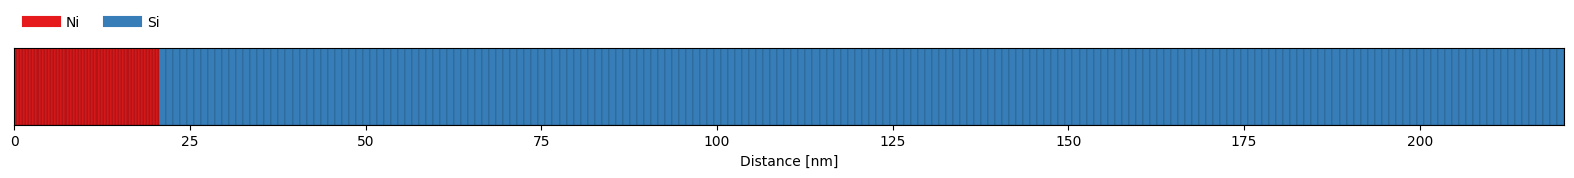

Structure properties:

Name   : Ni 20
Thickness : 220.5800 nanometer
Roughness : 0.0000 nanometer
----
98 times Ni amorphous: 20.5800 nanometer
200 times Si amorphous: 200.0000 nanometer
----
no substrate



In [39]:
S.visualize()
print(S)

## Initialize Heat and the Excitation

In [40]:
h = ud.Heat(S, True)

h.save_data = False
h.disp_messages = True

In [41]:
h.excitation = {'fluence': [1.2]*u.mJ/u.cm**2,
                'delay_pump':  [0]*u.ps,
                'pulse_width':  [0.15]*u.ps,
                'multilayer_absorption': True,
                'wavelength': 800*u.nm,
                'theta': 90*u.deg}
# temporal and spatial grid
delays = np.r_[-2000:-10:0.5, -10:10:0.05, 10:600:0.025]*u.ps
_, _, distances = S.get_distances_of_layers()

## Calculate Heat Diffusion for 2-Temperature Model

In [42]:
# enable heat diffusion
h.heat_diffusion = True
# set the boundary conditions
h.boundary_conditions = {'top_type': 'isolator', 'bottom_type': 'isolator'}
# The resulting temperature profile is calculated in one line:

temp_map, delta_temp = h.get_temp_map(delays, 300)

Surface incidence fluence scaled by factor 1.0000 due to incidence angle theta=90.00 deg
Calculating _heat_diffusion_ for excitation 1:1 ...
Absorption profile is calculated by multilayer formalism.
Total reflectivity of 86.2 % and transmission of 2.7 %.


0it [00:00, ?it/s]

Elapsed time for _heat_diffusion_ with 1 excitation(s): 6.428306 s
Calculating _heat_diffusion_ without excitation...


0it [00:00, ?it/s]

Elapsed time for _heat_diffusion_: 9.213626 s
Elapsed time for _temp_map_: 16.552794 s


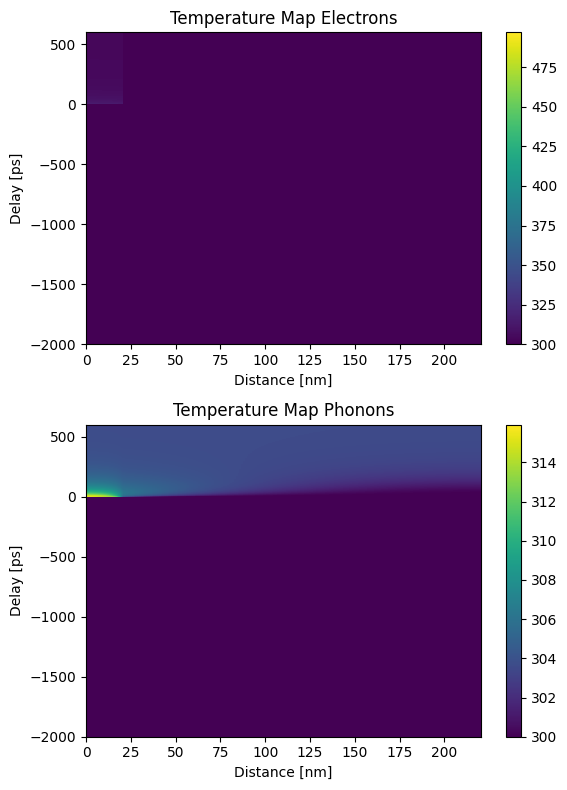

In [43]:
plt.figure(figsize=[6, 8])
plt.subplot(2, 1, 1)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 0],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Electrons')

plt.subplot(2, 1, 2)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 1],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Phonons')

plt.tight_layout()
plt.show()

## Strain simulations

Calculating linear thermal expansion ...
Calculating coherent dynamics with ODE solver ...


0it [00:00, ?it/s]

Elapsed time for _strain_map_: 9.534864 s


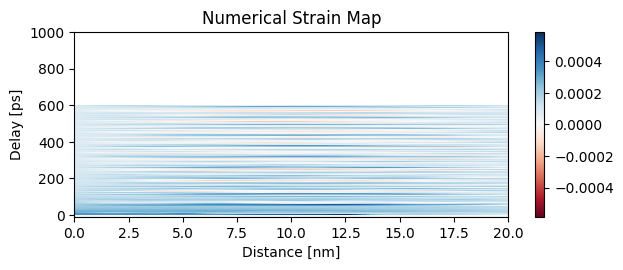

In [44]:
pnum = ud.PhononNum(S, True)
pnum.save_data = False
pnum.disp_messages = True


strain_map = pnum.get_strain_map(delays, temp_map, delta_temp)


plt.subplot(2, 1, 2)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude,
               strain_map, cmap='RdBu', vmin=-np.max(strain_map),
               vmax=np.max(strain_map), shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Numerical Strain Map')
plt.xlim(0,20)
plt.ylim(-10,1000)
plt.tight_layout()
plt.show()

## Landau-Lifshitz-Bloch Simulations

The `LLB` class requires a `Structure` object and a boolean `force_recalc` in order to overwrite previous simulation results.

These results are saved in the `cache_dir` when `save_data` is enabled.
Printing simulation messages can be en-/disabled using `disp_messages` and progress bars can be enabled using the boolean switch `progress_bar`.

In [45]:
llb = ud.LLB(S, True)

llb.save_data = False
llb.disp_messages = True

print(llb)

Landau-Lifshitz-Bloch Magnetization Dynamics simulation properties:

Magnetization simulation properties:

This is the current structure for the simulations:

Structure properties:

Name   : Ni 20
Thickness : 220.5800 nanometer
Roughness : 0.0000 nanometer
----
98 times Ni amorphous: 20.5800 nanometer
200 times Si amorphous: 200.0000 nanometer
----
no substrate


Display properties:

================  =======
       parameter  value
================  =======
    force recalc  True
 cache directory  ./
display messages  True
       save data  False
    progress bar  True
================  =======


### Brillouin Function

Internally, the LLB calculates a mean-field magnetization map for the according electron temperatures
$T_e$ at for every layer and for every time step. This is done by solving the *Brillouin* function of each
layer and then mapping the result onto the according spatio-temporal grid, as given by the `temp_map`.

In [46]:
mean_field_mag_map = llb.get_mean_field_mag_map(temp_map[:, :, 0])

Calculating _mean_field_magnetization_map_ ...
Elapsed time for _mean_field_magnetization_map_: 13.085998 s


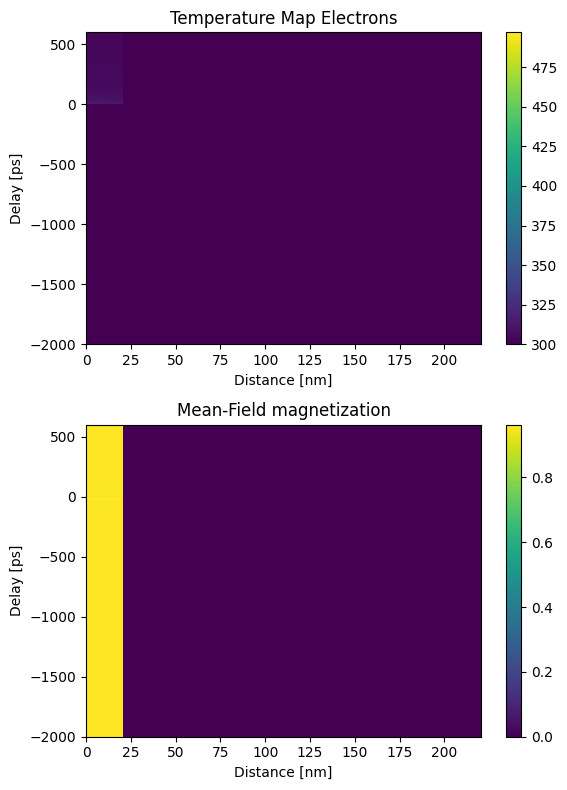

In [47]:
plt.figure(figsize=[6, 8])

plt.subplot(2, 1, 1)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 0],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Electrons')

plt.subplot(2, 1, 2)

plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, mean_field_mag_map, shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Mean-Field magnetization')

plt.tight_layout()

plt.show()

## LLB simulations

In [48]:
init_mag = np.array([1.0, (0.*u.deg).to('rad').magnitude, (0*u.deg).to('rad').magnitude])

H_amp = 0.35
phi = np.deg2rad(10)
magnetization_map = llb.get_magnetization_map(delays, temp_map=temp_map,strain_map=strain_map, init_mag=init_mag,
                                              H_ext=np.array([H_amp*np.sin(phi), 0, H_amp*np.cos(phi)]))

Calculating _magnetization_map_ ...
Calculating _mean_field_magnetization_map_ ...
Elapsed time for _mean_field_magnetization_map_: 13.096423 s


0it [00:00, ?it/s]

Elapsed time for _LLB_: 45.206638 s
Elapsed time for _magnetization_map_: 45.207041 s


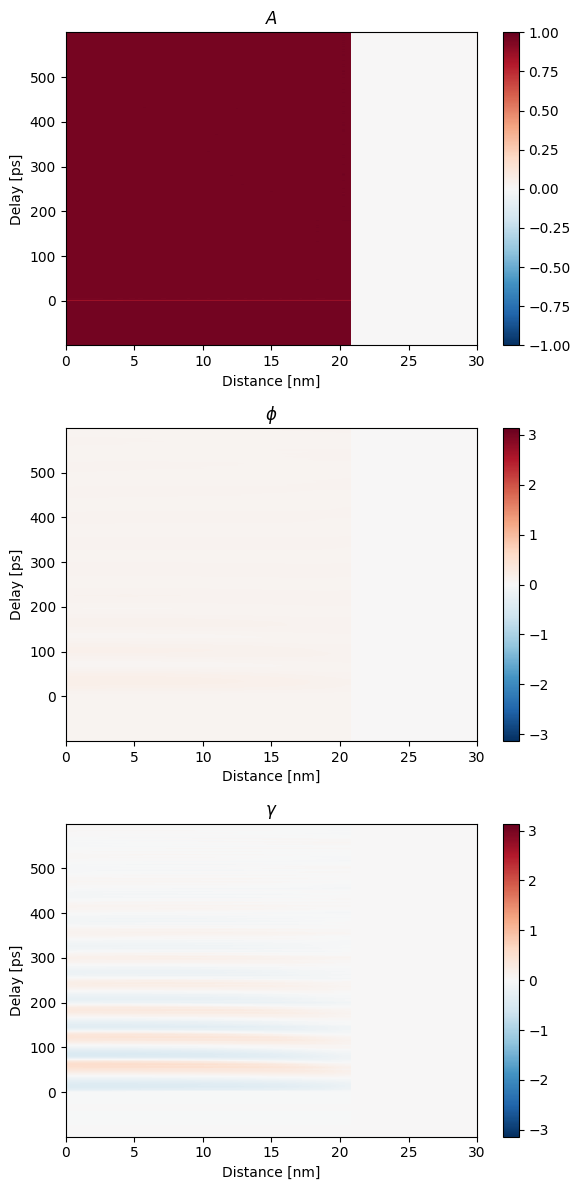

In [49]:
plt.figure(figsize=[6, 12])

ind_trim = np.where(delays>-100*u.ps)[0]



plt.subplot(3, 1, 1)
plt.pcolormesh(distances.to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map[ind_trim, :, 0],
               shading='auto', cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$A$')

plt.xlim(0,30)

plt.subplot(3, 1, 2)
plt.pcolormesh(distances.to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map[ind_trim, :, 1],
               shading='auto', cmap='RdBu_r', vmin=-3.14, vmax=3.14)
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$\phi$')

plt.xlim(0,30)

plt.subplot(3, 1, 3)
plt.pcolormesh(distances.to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map[ind_trim, :, 2],
               shading='auto', cmap='RdBu_r', vmin=-3.14, vmax=3.14)
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$\gamma$')

plt.xlim(0,30)
plt.tight_layout()
plt.show()

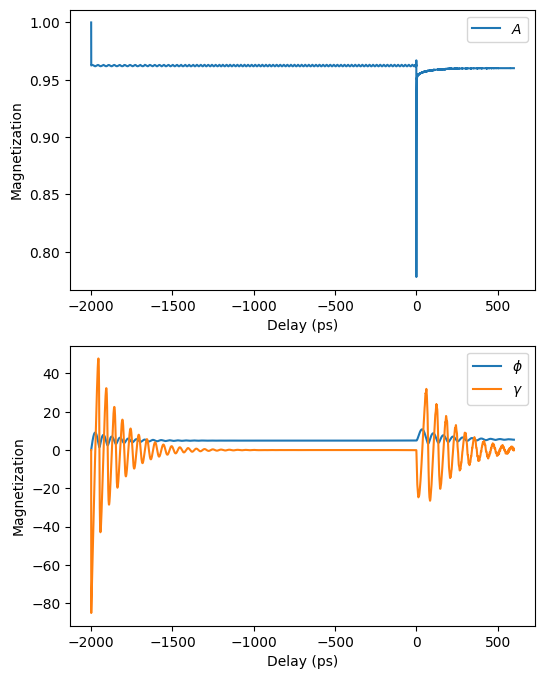

In [50]:
plt.figure(figsize=[6,8])
plt.subplot(2,1,1)
plt.plot(delays, np.mean(magnetization_map[:, 0:20, 0], axis=1), label=r'$A$')
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.subplot(2,1,2)
plt.plot(delays, (np.mean(magnetization_map[:, 0:20, 1], axis=1)*u.rad).to('deg'), label=r'$\phi$')
plt.plot(delays, (np.mean(magnetization_map[:, 0:20, 2], axis=1)*u.rad).to('deg'), label=r'$\gamma$')
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.show()

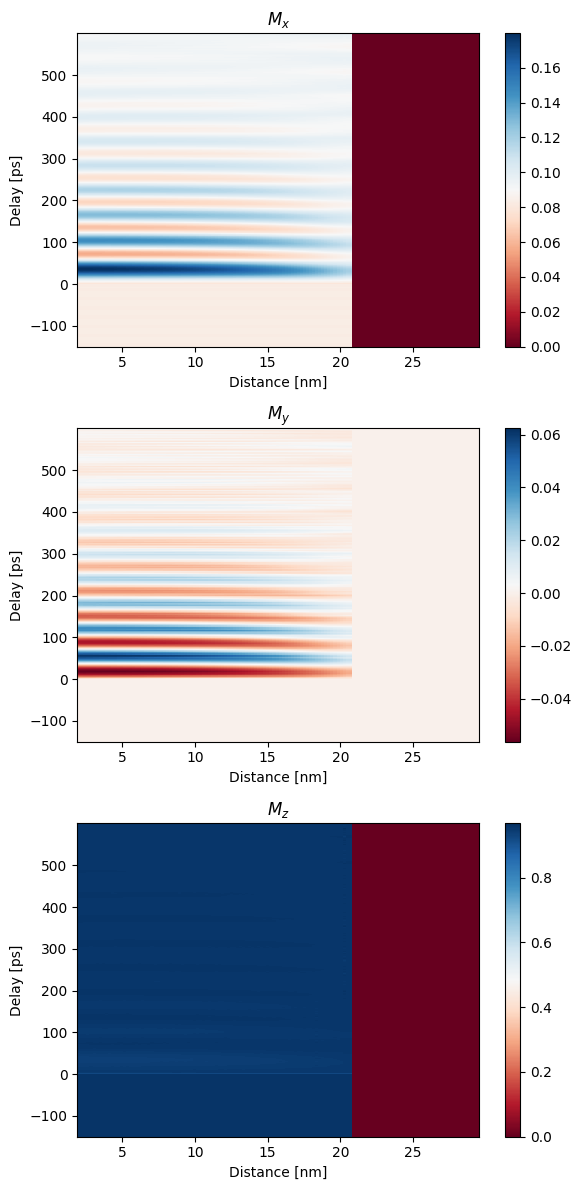

In [51]:
ind_trim = np.where(delays>-150*u.ps)[0]
magnetization_map_xyz = ud.helpers.convert_polar_to_cartesian(magnetization_map[ind_trim, 9:107, :])
plt.figure(figsize=[6, 12])
plt.subplot(3, 1, 1)
plt.pcolormesh(distances[9:107].to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map_xyz[:, :, 0],
               shading='auto', cmap='RdBu')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$M_x$')

#plt.xlim(0,30)

plt.subplot(3, 1, 2)
plt.pcolormesh(distances[9:107].to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map_xyz[:, :, 1],
               shading='auto', cmap='RdBu')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$M_y$')

#plt.xlim(0,30)

plt.subplot(3, 1, 3)
plt.pcolormesh(distances[9:107].to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map_xyz[:, :, 2],
               shading='auto', cmap='RdBu')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$M_z$')

#plt.xlim(0,30)
plt.tight_layout()
plt.show()

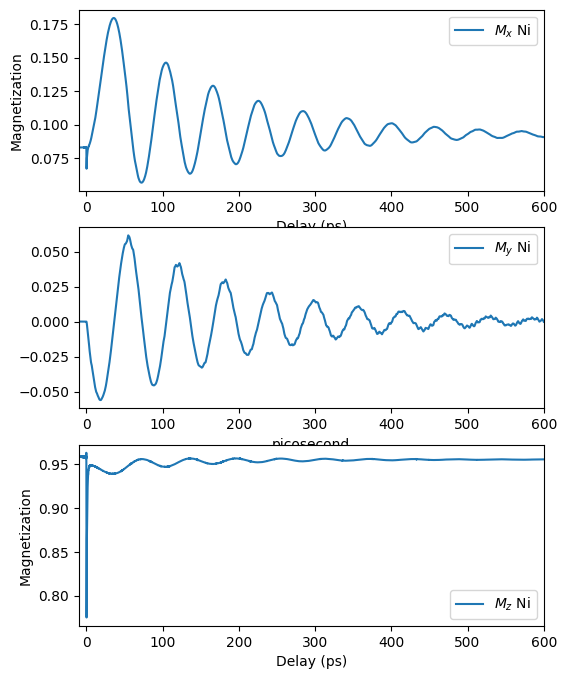

In [52]:
ind_trim = np.where(delays>-15*u.ps)[0]
magnetization_map_xyz = ud.helpers.convert_polar_to_cartesian(magnetization_map[ind_trim, :, :])

plt.figure(figsize=[6,8])
plt.subplot(3,1,1)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[:, 0:20, 0], axis=1), label=r'$M_x$ Ni')
plt.legend()
plt.xlim(-10,600)
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.subplot(3,1,2)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[:, 0:20, 1], axis=1), label=r'$M_y$ Ni')
plt.legend()
plt.xlim(-10,600)
plt.subplot(3,1,3)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[:, 0:20, 2], axis=1), label=r'$M_z$ Ni')
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.xlim(-10,600)
plt.show()

## Compare with LLB

In [53]:
llg = ud.LLG(S, True)

llg.save_data = False
llg.disp_messages = True

print(llg)

magnetization_map_LLG = llg.get_magnetization_map(delays, temp_map=temp_map,strain_map=strain_map, init_mag=init_mag,
                                              H_ext=np.array([H_amp*np.sin(phi), 0, H_amp*np.cos(phi)]), simulation_type='LLB')

magnetization_map_LLG_xyz = ud.helpers.convert_polar_to_cartesian(magnetization_map_LLG)

Landau-Lifshitz-Gilbert Magnetization Dynamics simulation properties:

Magnetization simulation properties:

This is the current structure for the simulations:

Structure properties:

Name   : Ni 20
Thickness : 220.5800 nanometer
Roughness : 0.0000 nanometer
----
98 times Ni amorphous: 20.5800 nanometer
200 times Si amorphous: 200.0000 nanometer
----
no substrate


Display properties:

================  =======
       parameter  value
================  =======
    force recalc  True
 cache directory  ./
display messages  True
       save data  False
    progress bar  True
================  =======
Calculating _magnetization_map_ ...


0it [00:00, ?it/s]

Elapsed time for _LLB_: 5.542455 s
Elapsed time for _magnetization_map_: 5.542619 s


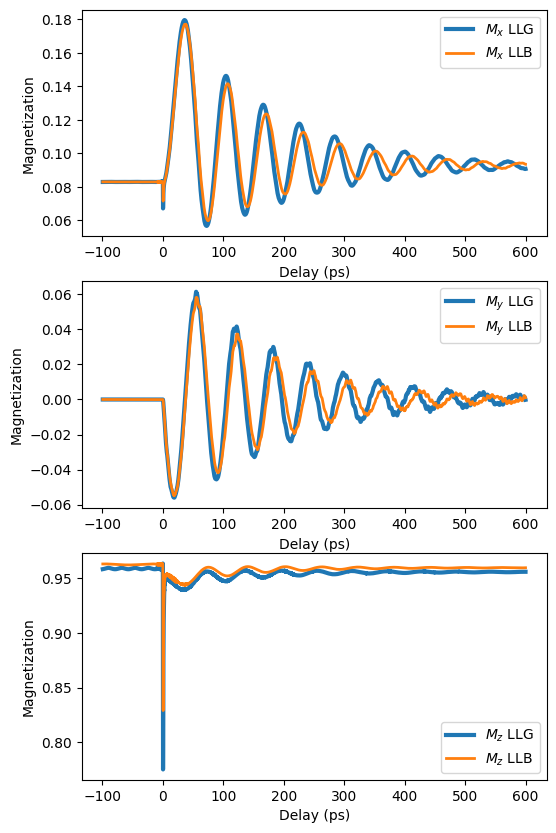

In [54]:
magnetization_map_xyz = ud.helpers.convert_polar_to_cartesian(magnetization_map[:, :, :])
magnetization_map_LLG_xyz = ud.helpers.convert_polar_to_cartesian(magnetization_map_LLG[:, :, :])

ind_trim = np.where(delays>-100*u.ps)[0]

plt.figure(figsize=[6,10])
plt.subplot(3,1,1)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[ind_trim, 0:20, 0], axis=1), label=r'$M_x$ LLG', lw =3)
plt.plot(delays[ind_trim], np.mean(magnetization_map_LLG_xyz[ind_trim, 0:20, 0], axis=1), label=r'$M_x$ LLB', lw =2)
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.subplot(3,1,2)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[ind_trim, 0:20, 1], axis=1), label=r'$M_y$ LLG', lw =3)
plt.plot(delays[ind_trim], np.mean(magnetization_map_LLG_xyz[ind_trim, 0:20, 1], axis=1), label=r'$M_y$ LLB', lw =2)
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.subplot(3,1,3)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[ind_trim, 0:20, 2], axis=1), label=r'$M_z$ LLG', lw =3)
plt.plot(delays[ind_trim], np.mean(magnetization_map_LLG_xyz[ind_trim, 0:20, 2], axis=1), label=r'$M_z$ LLB', lw =2)
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.savefig("comparison_LLB_LLG1.png", dpi = 250)
plt.show()